In [1]:
# Script Name: Assignment 12
# Purpose of script: Complete Assignment 12 for Econ 320
# Author: Gavin Mason
# Date Created: 11/29/2022
# Notes:

# Packages
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms # BP test
from statsmodels.stats.diagnostic import het_white
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import math

In [11]:
birthday = 11212001
np.random.seed(11212001)
b0 = 3
b1 = 2
x = np.random.normal(10, 1, 1000000)
u = np.random.normal(0, 1, 1000000)
ux = u*x
y = b0+b1*x
y1 = b0+b1*x+u
y2 = b0+b1*x+ux
population = {"x":x,"u":u,"ux":ux,"y":y, "y1":y1, "y2":y2} 
population = pd.DataFrame(population)

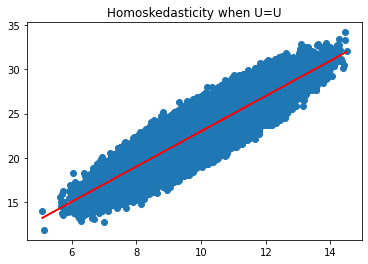

In [14]:
fig1 = plt.scatter(x,y1)
fig1 = plt.plot(x,y, color = 'red')
fig1 = plt.title('Homoskedasticity when U=U')

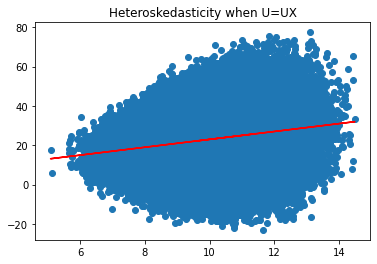

In [13]:
fig2 = plt.scatter(x,y2)
fig2 = plt.plot(x,y, color = 'red')
fig2 = plt.title('Heteroskedasticity when U=UX')

In [ ]:
#Visually, when U=UX the residual plot tends to cone towards the center. When U=U, the residual plot is much more
#straight around the line.

In [22]:

population_data1 = pd.DataFrame({'y1':y1, 'x':x})

sample_df1 = population_data1.sample(n=1000, random_state = 11212001)
reg1 = smf.ols(formula='y1 ~ x', data = sample_df1).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     3691.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:16:06   Log-Likelihood:                -1448.8
No. Observations:                1000   AIC:                             2902.
Df Residuals:                     998   BIC:                             2911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8080      0.334      8.402      0.000       2.152       3.464
x              2.0193      0.033     60.758      0.000       1.954       2.085
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.321
Skew:                          -0.010   Prob(JB):                        0.852
Kurtosis:                       2.914   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
sample_df1['y1pred']=reg1.params[1]*sample_df1['x']+reg1.params[0]
sample_df1['residy1']=sample_df1['y1']-sample_df1['y1pred']
sample_df1['residy1sq'] = reg1.resid**2

reg = smf.ols(formula='residy1sq ~ x', data = sample_df1).fit()

hypotheses = ['x = 0']
#automated F test:

ftest = reg.f_test(hypotheses)
fstat = ftest.statistic
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

#Since our fpval is large, we cannot reject our null hypothesis. 
#Therefore, we conclude that x is not statistically significant in determining the u-hat^2

fstat: [[3.88967223]]

fpval: 0.048859664885123055



In [25]:
population_data2 = pd.DataFrame({'y2':y2, 'x':x})

sample2 = population_data2.sample(n=1000, random_state = 11212001)
reg2 = smf.ols(formula='y2 ~ x', data = sample2).fit()
sample_df2['y2pred']=reg2.params[1]*sample2['x']+reg2.params[0]
sample_df2['residy2']=sample2['y2']-sample2['y2pred']
sample_df2['residy2sq'] = reg2.resid**2
                                     
reg = smf.ols(formula=''residy2sq' ~ x', data = sample_df2).fit()
                                     
hypotheses = ['x = 0']
ftest = reg.f_test(hypotheses)
fstat = ftest.statistic
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

#Since our fpval is very small, we reject our null hypothesis. 
#Therefore, we conclude that x is statistically significant in determining 
#u-hat^2 at a=.01

fstat: [[35.55753562]]

fpval: 3.4330365181293598e-09



In [26]:
reg11 = smf.ols(formula='y1 ~ x', data = sample2).fit(cov_type='HC0')
reg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     3924.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:22:28   Log-Likelihood:                -1448.8
No. Observations:                1000   AIC:                             2902.
Df Residuals:                     998   BIC:                             2911.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8080      0.321      8.737      0.000       2.178       3.438
x              2.0193      0.032     62.640      0.000       1.956       2.083
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.321
Skew:                          -0.010   Prob(JB):                        0.852
Kurtosis:                       2.914   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [29]:
reg21 = smf.ols(formula='y2 ~ x', data = sample2).fit(cov_type='HC0')
reg21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     47.43
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.01e-11
Time:                        13:23:16   Log-Likelihood:                -3765.1
No. Observations:                1000   AIC:                             7534.
Df Residuals:                     998   BIC:                             7544.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1780      3.248      0.055      0.956      -6.189       6.545
x              2.2854      0.332      6.887      0.000       1.635       2.936
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.142
Skew:                          -0.027   Prob(JB):                        0.931
Kurtosis:                       3.024   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [ ]:
#Var(Bhat1) = 0.110224 for the robust model vs. Var(bhat1) = 0.10900065313084764 for Assignment 11. 
#Almost exactly the same!